# 고양이 수염 스티커 만들기

## 라이브러리 불러오기

In [1]:
import os
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np

### Face image 불러오기

In [2]:
ryujin_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/ryujin.jpg'
sugar_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/sugar.jpg'
bts_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/bts.jpg'
angel_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/angelina.jpg'

In [3]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/ryujin.jpg'

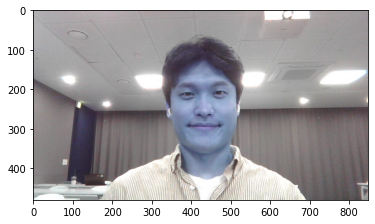

In [4]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/my_image.jpg'
img_bgr = cv2.imread(my_image_path, 1)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

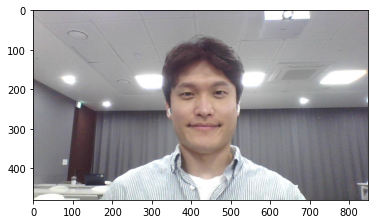

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [6]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()

In [7]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

### Face detection

rectangles[[(345, 160) (531, 345)]]


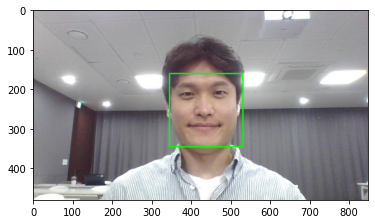

In [8]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### Face landmark model 불러오기

In [9]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [10]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


### Face landmark localization

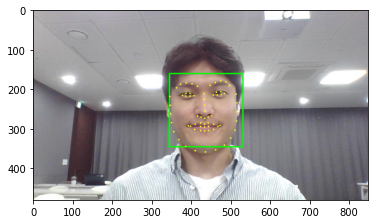

In [11]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show() 

### Applying stickers to face image

In [12]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[3]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(350, 284)
(x,y) : (435,163)
(w,h) : (187,187)


In [13]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/001-cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(187, 187, 3)


In [14]:
x = x - w // 2
print ('(x,y) : (%d,%d)'%(x, y))

(x,y) : (342,163)


In [15]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식
sticker_area = img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

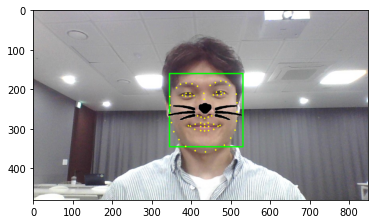

In [16]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### 스티커 적용하고 자연스럽게 만들기

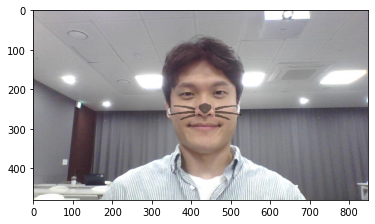

In [17]:
sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]

add = cv2.addWeighted(sticker_area, 0.5, img_sticker, 0.3, 0)

img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==0, add, sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

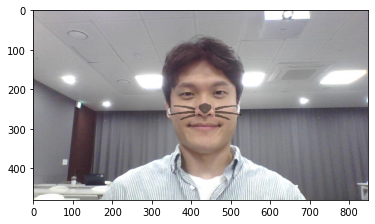

In [18]:
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))

# 함수화

In [42]:
def test_sticker(image):
    #이미지 로드
    my_image_path = image
    img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
    img_bgr = cv2.resize(img_bgr, (640, 360)) 
    img_show = img_bgr.copy()    
    
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

    #detector를 이용해 얼굴의 bounding box 추출
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    dlib_rects = detector_hog(img_rgb, 1) 
    
    # 얼굴 검출
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    
    #저장한 landmark 모델 불러오기

    model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)
    
    
    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)
        
    for landmark in list_landmarks:
        for idx, point in enumerate(list_points):
            cv2.circle(img_show, point, 2, (0, 255, 255), -1)    
    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)        
    
    #스티커 적용위치
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        # whiskers center index : 33
        x = landmark[30][0]
        y = landmark[30][1] - dlib_rect.height()//2
        w = dlib_rect.width()
        h = dlib_rect.width()

    sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/001-cat-whiskers.png'
    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w,h))
    
    # top, left 위치 설정
    refined_x = x - w//2 # left
    refined_y = y   # top

    sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]]
    

    add = cv2.addWeighted(sticker_area, 0.5, img_sticker, 0.3, 0)
    
    sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,add).astype(np.uint8)

    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.show()

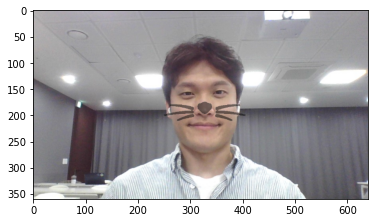

In [43]:
test_sticker(my_image_path)

(1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

(2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.

얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
실행 속도가 중요할까요?
스티커앱을 만들 때 정확도가 얼마나 중요할까요?

In [21]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'

In [49]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/001-cat-whiskers.png'

In [50]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/my_image.jpg'
angel_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/angelina.jpg'

In [22]:
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_frontalface_default.xml")
eye_detector = cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_eye.xml")
nose_detector = cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_mcs_nose.xml")

In [23]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from PIL import Image

def euclidean_distance(a, b):
    x1 = a[0]; y1 = a[1]
    x2 = b[0]; y2 = b[1]
    
    return math.sqrt(((x2 - x1) * (x2 - x1)) + ((y2 - y1) * (y2 - y1)))


def detectFace(img):
    faces = face_detector.detectMultiScale(img, 1.3, 5)
    #print("found faces: ", len(faces))

    if len(faces) > 0:
        face = faces[0]
        face_x, face_y, face_w, face_h = face
        img = img[int(face_y):int(face_y+face_h), int(face_x):int(face_x+face_w)]
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        return img, img_gray
    else:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        return img, img_gray
        #raise ValueError("No face found in the passed image ")

#def alignFace(img_path):
#    img = cv2.imread(img_path)

def alignFace(img_path):
    img = cv2.imread(img_path)
    plt.imshow(img[:, :, ::-1])
    plt.show()
    
    img_raw = img.copy()

    img, gray_img = detectFace(img)
    
    eyes = eye_detector.detectMultiScale(gray_img)
    
    #print("found eyes: ",len(eyes))
    
    if len(eyes) >= 2:
        #find the largest 2 eye
        
        base_eyes = eyes[:, 2]
        
        #눈 좌표
        #print(base_eyes)

        items = []
        for i in range(0, len(base_eyes)):
            item = (base_eyes[i], i)
            items.append(item)

        df = pd.DataFrame(items, columns = ["length", "idx"]).sort_values(by=['length'], ascending=False)

        eyes = eyes[df.idx.values[0:2]]

        #--------------------
        #decide left and right eye
        
        eye_1 = eyes[0]; eye_2 = eyes[1]

        if eye_1[0] < eye_2[0]:
            left_eye = eye_1
            right_eye = eye_2
        else:
            left_eye = eye_2
            right_eye = eye_1

        #--------------------
        #center of eyes

        left_eye_center = (int(left_eye[0] + (left_eye[2] / 2)), int(left_eye[1] + (left_eye[3] / 2)))
        left_eye_x = left_eye_center[0]; left_eye_y = left_eye_center[1]

        right_eye_center = (int(right_eye[0] + (right_eye[2]/2)), int(right_eye[1] + (right_eye[3]/2)))
        right_eye_x = right_eye_center[0]; right_eye_y = right_eye_center[1]

        #center_of_eyes = (int((left_eye_x+right_eye_x)/2), int((left_eye_y+right_eye_y)/2))

        cv2.circle(img, left_eye_center, 2, (255, 0, 0) , 2)
        cv2.circle(img, right_eye_center, 2, (255, 0, 0) , 2)
        #cv2.circle(img, center_of_eyes, 2, (255, 0, 0) , 2)

        #----------------------
        #find rotation direction

        if left_eye_y > right_eye_y:
            point_3rd = (right_eye_x, left_eye_y)
            direction = -1 #rotate same direction to clock
            print("rotate to clock direction")
        else:
            point_3rd = (left_eye_x, right_eye_y)
            direction = 1 #rotate inverse direction of clock
            print("rotate to inverse clock direction")

        #----------------------

        cv2.circle(img, point_3rd, 2, (255, 0, 0) , 2)

        cv2.line(img,right_eye_center, left_eye_center,(67,67,67),1)
        cv2.line(img,left_eye_center, point_3rd,(67,67,67),1)
        cv2.line(img,right_eye_center, point_3rd,(67,67,67),1)
        
        a = euclidean_distance(left_eye_center, point_3rd)
        b = euclidean_distance(right_eye_center, point_3rd)
        c = euclidean_distance(right_eye_center, left_eye_center)

        #print("left eye: ", left_eye_center)
        #print("right eye: ", right_eye_center)
        #print("additional point: ", point_3rd)
        #print("triangle lengths: ",a, b, c)
        
        cos_a = (b*b + c*c - a*a)/(2*b*c)
        #print("cos(a) = ", cos_a)
        angle = np.arccos(cos_a)
        #print("angle: ", angle," in radian")

        angle = (angle * 180) / math.pi
        print("angle: ", angle," in degree")

        if direction == -1:
            angle = 90 - angle

        print("angle: ", angle," in degree")

        #--------------------
        #rotate image

        new_img = Image.fromarray(img_raw)
        new_img = np.array(new_img.rotate(direction * angle))

    return new_img

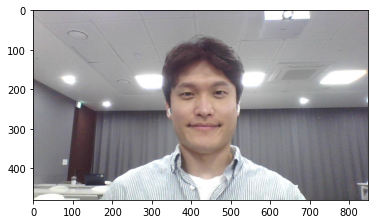

rotate to clock direction
angle:  86.42366562500258  in degree
angle:  3.5763343749974155  in degree


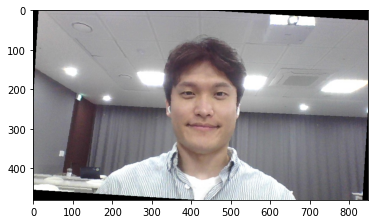

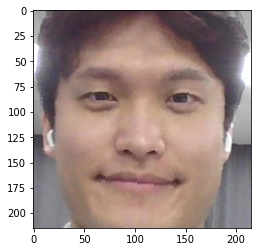

In [24]:
#test_set = [angel_path]
#cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

#image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
test_set = [my_image_path]
for instance in test_set:
    alignedFace = alignFace(instance)
    plt.imshow(alignedFace[:, :, ::-1])
    plt.show()

    img, gray_img = detectFace(alignedFace)
    plt.imshow(img[:, :, ::-1])
    plt.show()

In [45]:
import math
cos(86)

NameError: name 'cos' is not defined

In [25]:
my_image_path

'/aiffel/aiffel/camera_sticker/images/my_image.jpg'

In [26]:
ryujin_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/ryujin.jpg'
sugar_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/sugar.jpg'
bts_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/bts.jpg'
angel_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/angelina.jpg'

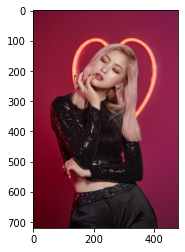

rotate to inverse clock direction
angle:  44.21517539700811  in degree
angle:  44.21517539700811  in degree


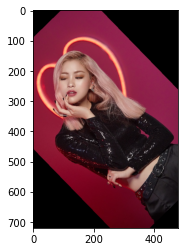

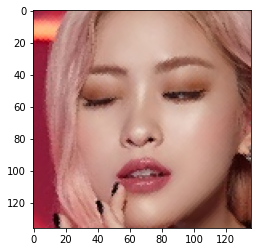

In [27]:
test_set = [ryujin_path]
for instance in test_set:
    alignedFace = alignFace(instance)
    plt.imshow(alignedFace[:, :, ::-1])
    plt.show()

    img, gray_img = detectFace(alignedFace)
    plt.imshow(img[:, :, ::-1])
    plt.show()

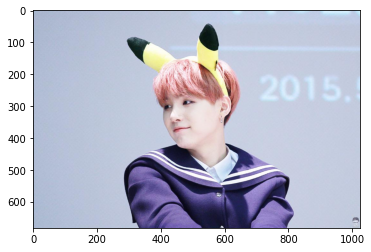

rotate to clock direction
angle:  77.07400087529405  in degree
angle:  12.925999124705953  in degree


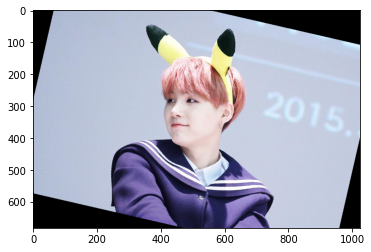

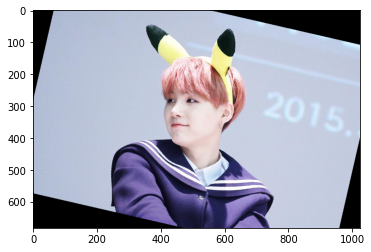

In [28]:
test_set = [sugar_path]
for instance in test_set:
    alignedFace = alignFace(instance)
    plt.imshow(alignedFace[:, :, ::-1])
    plt.show()

    img, gray_img = detectFace(alignedFace)
    plt.imshow(img[:, :, ::-1])
    plt.show()

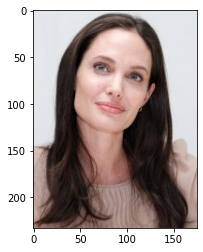

rotate to inverse clock direction
angle:  15.524110996754272  in degree
angle:  15.524110996754272  in degree


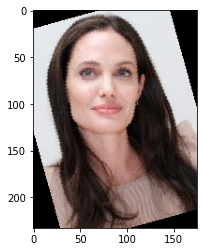

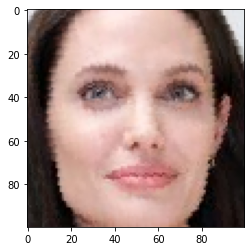

In [29]:
test_set = [angel_path]
for instance in test_set:
    alignedFace = alignFace(instance)
    plt.imshow(alignedFace[:, :, ::-1])
    plt.show()

    img, gray_img = detectFace(alignedFace)
    plt.imshow(img[:, :, ::-1])
    plt.show()

In [31]:
bts_path

'/aiffel/aiffel/camera_sticker/images/bts.jpg'

시도해볼 것
1. 회전 시켜서 스티커 붙이기 시도
2. 스티커 붙이고 회전시키기
3. 회전 각만 구해서, 스티커 회전 시킨 다음에, 원본 이미지에 붙이기

# 회고

회고 고 고고 고 정용

# Reference

1. https://velog.io/@choi_4843/OpenCV-%EC%B9%B4%EB%A9%94%EB%9D%BC-%EC%8A%A4%ED%8B%B0%EC%BB%A4-%EB%A7%8C%EB%93%A4%EA%B8%B0
2. https://hoon427.tistory.com/105
3. https://sefiks.com/2020/02/23/face-alignment-for-face-recognition-in-python-within-opencv/
4. https://github.com/serengil/tensorflow-101
5. https://github.com/serengil/deepface
6. https://github.com/serengil/tensorflow-101/blob/master/python/face-alignment.py
7. https://github.com/PEBpung/Aiffel/blob/master/Project/Exploration/E10.%20%EA%B3%A0%EC%96%91%EC%9D%B4%20%EC%88%98%EC%97%BC%20%EC%8A%A4%ED%8B%B0%EC%BB%A4%20%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb
8. https://github.com/silvermaking/Aiffel/blob/master/E10%EC%B9%B4%EB%A9%94%EB%9D%BC%EC%8A%A4%ED%8B%B0%EC%BB%A4%EC%95%B1%EB%A7%8C%EB%93%A4%EA%B8%B0with_BTS.ipynb